In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

df = pd.read_csv('stud_math.csv')
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
#В датасете представленно 30 столбцов, из которых 17 строковые величины и 13 - числовые
#Всего представленно 395 вхождений.
#В большинстве столбцов есть пропуски данных

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Количество баллов, повторяющееся более 5 раз: 15
Единичные значения: 18
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


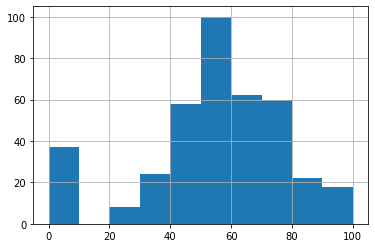

In [3]:
# Так как столбец Score является предсказываемой величиной модели, то стоит проанализировать его в первую очередь
# и по этой же причине строки с пропусками в этом столбце будут удаляться
df['score'].replace('', np.nan, inplace=True)
df.dropna(subset=['score'], inplace=True)

df.score.hist()
df.score.describe()
# Аномалий нет, далее проводим проверку на выбросы

display(pd.DataFrame(df.score.value_counts()))
print('Количество баллов, повторяющееся более 5 раз:',
      (df.score.value_counts() > 5).sum())
print("Единичные значения:", df.score.nunique())
df.loc[:, ['score']].info()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


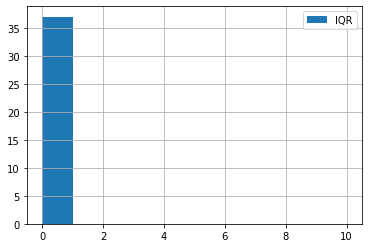

In [4]:
# Проверка столбца score на выбросы
# Проверка на выбросы столюца absences
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.score.loc[df.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

# Далее отфильтруем данные
df = df.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [5]:
display(pd.DataFrame(df.score.value_counts()))
print('Количество баллов, повторяющееся более 5 раз:',
      (df.score.value_counts() > 5).sum())
print("Единичные значения:", df.score.nunique())
df.loc[:, ['score']].info()

# Выбросов нет

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Количество баллов, повторяющееся более 5 раз: 15
Единичные значения: 18
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [6]:
# Так как в датасете много пропусков, удаление всех пропусков во всех столбцам повлечет за собой
# сильное сокращение объема выборки, то было принято решение пропуски числовых значений заменить на медиану,
# а пропуски категориальных на моду
def null_replace(x):
    for i in df.columns:
        if df[i].dtype == float:
            df[i] = df[i].fillna(df[i].median())

        elif df[i].dtype == object:
            df[i] = df[i].fillna(df[i].mode()[0])
    return x


students = df.apply(null_replace)
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 389 non-null    float64
 7   Fedu                 389 non-null    float64
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            389 non-null    obj

In [7]:
# School
pd.DataFrame(students.school.value_counts())
# Аномалий нет, большинство значений приходится на GP

# sex
pd.DataFrame(students.sex.value_counts())
# Аномалий нет, большинство женщины

,sex
F,204
M,185


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

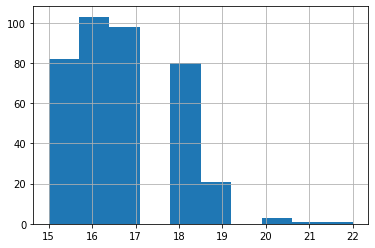

In [8]:
# Age - числовой столбец, посмотрим его распределение
students.age.hist()
students.age.describe()
# Пропусков нет, наибольшее количество значений приходится на 16-17 лет, 20,21,22 года - единичные значениея,
# однако они входят в диапазон по условиям и потому не являются аномалиями, выбросов нет

In [9]:
# address
pd.DataFrame(students.address.value_counts())
# Аномалий нет, большинство 'U' - городской

# famsize
pd.DataFrame(students.famsize.value_counts())
# Аномалий нет, у болшинство семья выше 3 человек

# Pstatus
pd.DataFrame(students.Pstatus.value_counts())
# Аномалий нет, у большинство родители живут вместе

,Pstatus
T,353
A,36


count    389.000000
mean       2.768638
std        1.090230
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

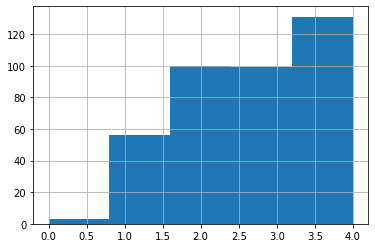

In [10]:
# Medu
students['Medu'].hist(bins=5)
students['Medu'].describe()
# Выбросов и аномалий нет, у большинства мать имеет высшее образование, необразованных матерей единицы

3.0    118
2.0    105
4.0     88
1.0     75
0.0      2
Name: Fedu, dtype: int64

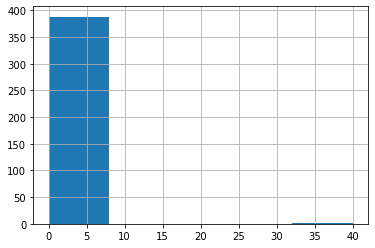

In [11]:
# Fedu

students['Fedu'].hist(bins=5)
students['Fedu'].describe()

# Было выявлена одна запись со значением 40, что является аномалией,
# так как по условиям задания могут быть всего 4 значения, строку с этой записью удаляем.
students.drop(students[students.Fedu > 5].index, inplace=True)

students['Fedu'].value_counts()
# У большинства у отцов средне-специальное образование, либо 9 улассов, необразованных отцов единицы

In [12]:
# Mjob
pd.DataFrame(students.Mjob.value_counts())
# Аномалий нет, у большинства матери заняты в прочих сферах, меньше всего приходится на здравоохранение

# Fjob
pd.DataFrame(students.Fjob.value_counts())
# Аномалий нет, у большинства отцы заняты в прочих сферах, меньше всего приходится на здравоохранение

# reason
pd.DataFrame(students.reason.value_counts())
# Аномалий нет, большинство привлекли образовательные программы, по просим меньшинство

# guardian
pd.DataFrame(students.guardian.value_counts())
# Аномалий нет, у подавляющего большинства опекун мать

,guardian
mother,279
father,85
other,24


count    388.000000
mean       2.033505
std        0.839226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

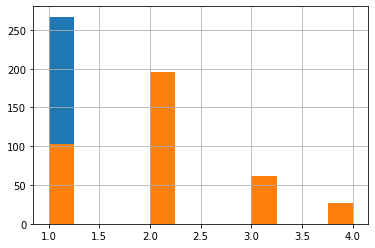

In [13]:
# traveltime
students['traveltime'].hist(bins=12)
students['traveltime'].describe()
# Выбросов и аномалий нет, у большинства время в пути анимает менее 15 минут

# studytime
students['studytime'].hist(bins=12)
students['studytime'].describe()
# Выбросов и аномалий нет, у большинства время на учебу 2-5 часов, менее всего занимаются более 10 часов

count    388.000000
mean       0.309278
std        0.713268
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

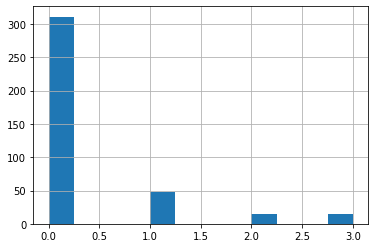

In [14]:
# failures
students['failures'].hist(bins=12)
students['failures'].describe()
# Выбросов и аномалий нет, у большинства нет неудач, однако 2 и 3 неудачи у примерно равного количества учеников

In [15]:
# famsup
pd.DataFrame(students.famsup.value_counts())
# Выбросов и аномалий нет, у большинства есть внеобразовательная поддержка

# paid
pd.DataFrame(students.paid.value_counts())
# Выбросов и аномалий нет, у большинства есть дополнительные платные занятия по математике

# activities
pd.DataFrame(students.activities.value_counts())
# Выбросов и аномалий нет, у большинства есть дополнительные внеучебные занятия

# nursery
pd.DataFrame(students.nursery.value_counts())
# Выбросов и аномалий нет, у большинства посещали детский сад

# higher
pd.DataFrame(students.higher.value_counts())
# Выбросов и аномалий нет, большинство хочет получить высшее образование

# internet
pd.DataFrame(students.internet.value_counts())
# Выбросов и аномалий нет, у большинства есть интернет

# romantic
pd.DataFrame(students.romantic.value_counts())
# Выбросов и аномалий нет, у большинства нет романтических отношений

,romantic
no,265
yes,123


-6.0     196
-3.0     103
-9.0      62
-12.0     27
Name: studytime, granular, dtype: int64

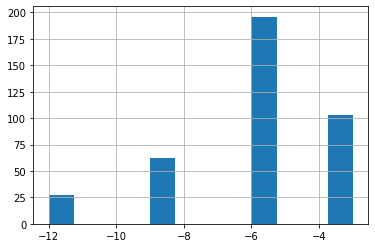

In [16]:
#studytime, granular
students['studytime, granular'].hist(bins=12)
students['studytime, granular'].describe()
students['studytime, granular'].value_counts()
# Большинство значений приходится на -6, менее всего на -12

count    387.000000
mean       3.945736
std        0.863570
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

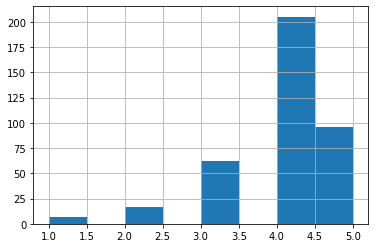

In [17]:
# famrel
students['famrel'].value_counts()
# Была выявлена одна запись со значением -1, что является аномалией,
# так как по условиям задания могут быть значения от 1 до 5, строку с этой записью удаляем
students.drop(students[students.famrel < 1].index, inplace=True)

students['famrel'].hist(bins=8)
students['famrel'].describe()
# У большинства хорошие отношения в семье, плохие отношения у единиц

count    387.000000
mean       3.542636
std        1.379012
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

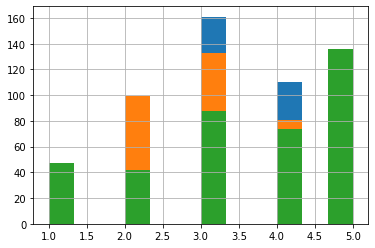

In [18]:
# freetime
students['freetime'].hist(bins=12)
students['freetime'].describe()
# Выбросов и аномалий нет, У большинства среднее количество свободного времени

# goout
students['goout'].hist(bins=12)
students['goout'].describe()
# Выбросов и аномалий нет, большинство проводят среднее время с друзьями

# health
students['health'].hist(bins=12)
students['health'].describe()
# Выбросов и аномалий нет, у большинства отличное состояние здоровья, у тех у кого плохое и очень плохое -
# количество примерно одинаковое

count    387.000000
mean       7.217054
std       23.342004
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

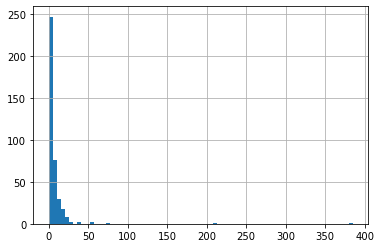

In [19]:
# absences
students['absences'].hist(bins=74)
students['absences'].describe()
# Судя по графику в этом столбце явно есть выбросы. Большинство значений находится на интервале от 0 до 50
# среднее составляет 7, 1 квартиль 0, 3 квартиль 8

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


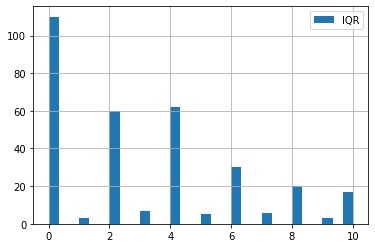

In [20]:
# Проверка на выбросы столбца absences
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30, range=(0, 10), label='IQR')

plt.legend()

# Далее отфильтруем данные
students = students.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [21]:
# Проверяем результат фильтрации
display(pd.DataFrame(students.absences.value_counts()))
print('Записи с количеством пропусков, повторяющихся более 10 раз:',
      (students.absences.value_counts() > 10).sum())
print("Единичные значения:", students.absences.nunique())
students.loc[:, ['absences']].info()
# Было отфильтрованно 15 единичных значений

,absences
0.0,110
4.0,62
2.0,60
6.0,30
8.0,20
10.0,17
12.0,12
14.0,11
3.0,7
16.0,7


Записи с количеством пропусков, повторяющихся более 10 раз: 8
Единичные значения: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  370 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


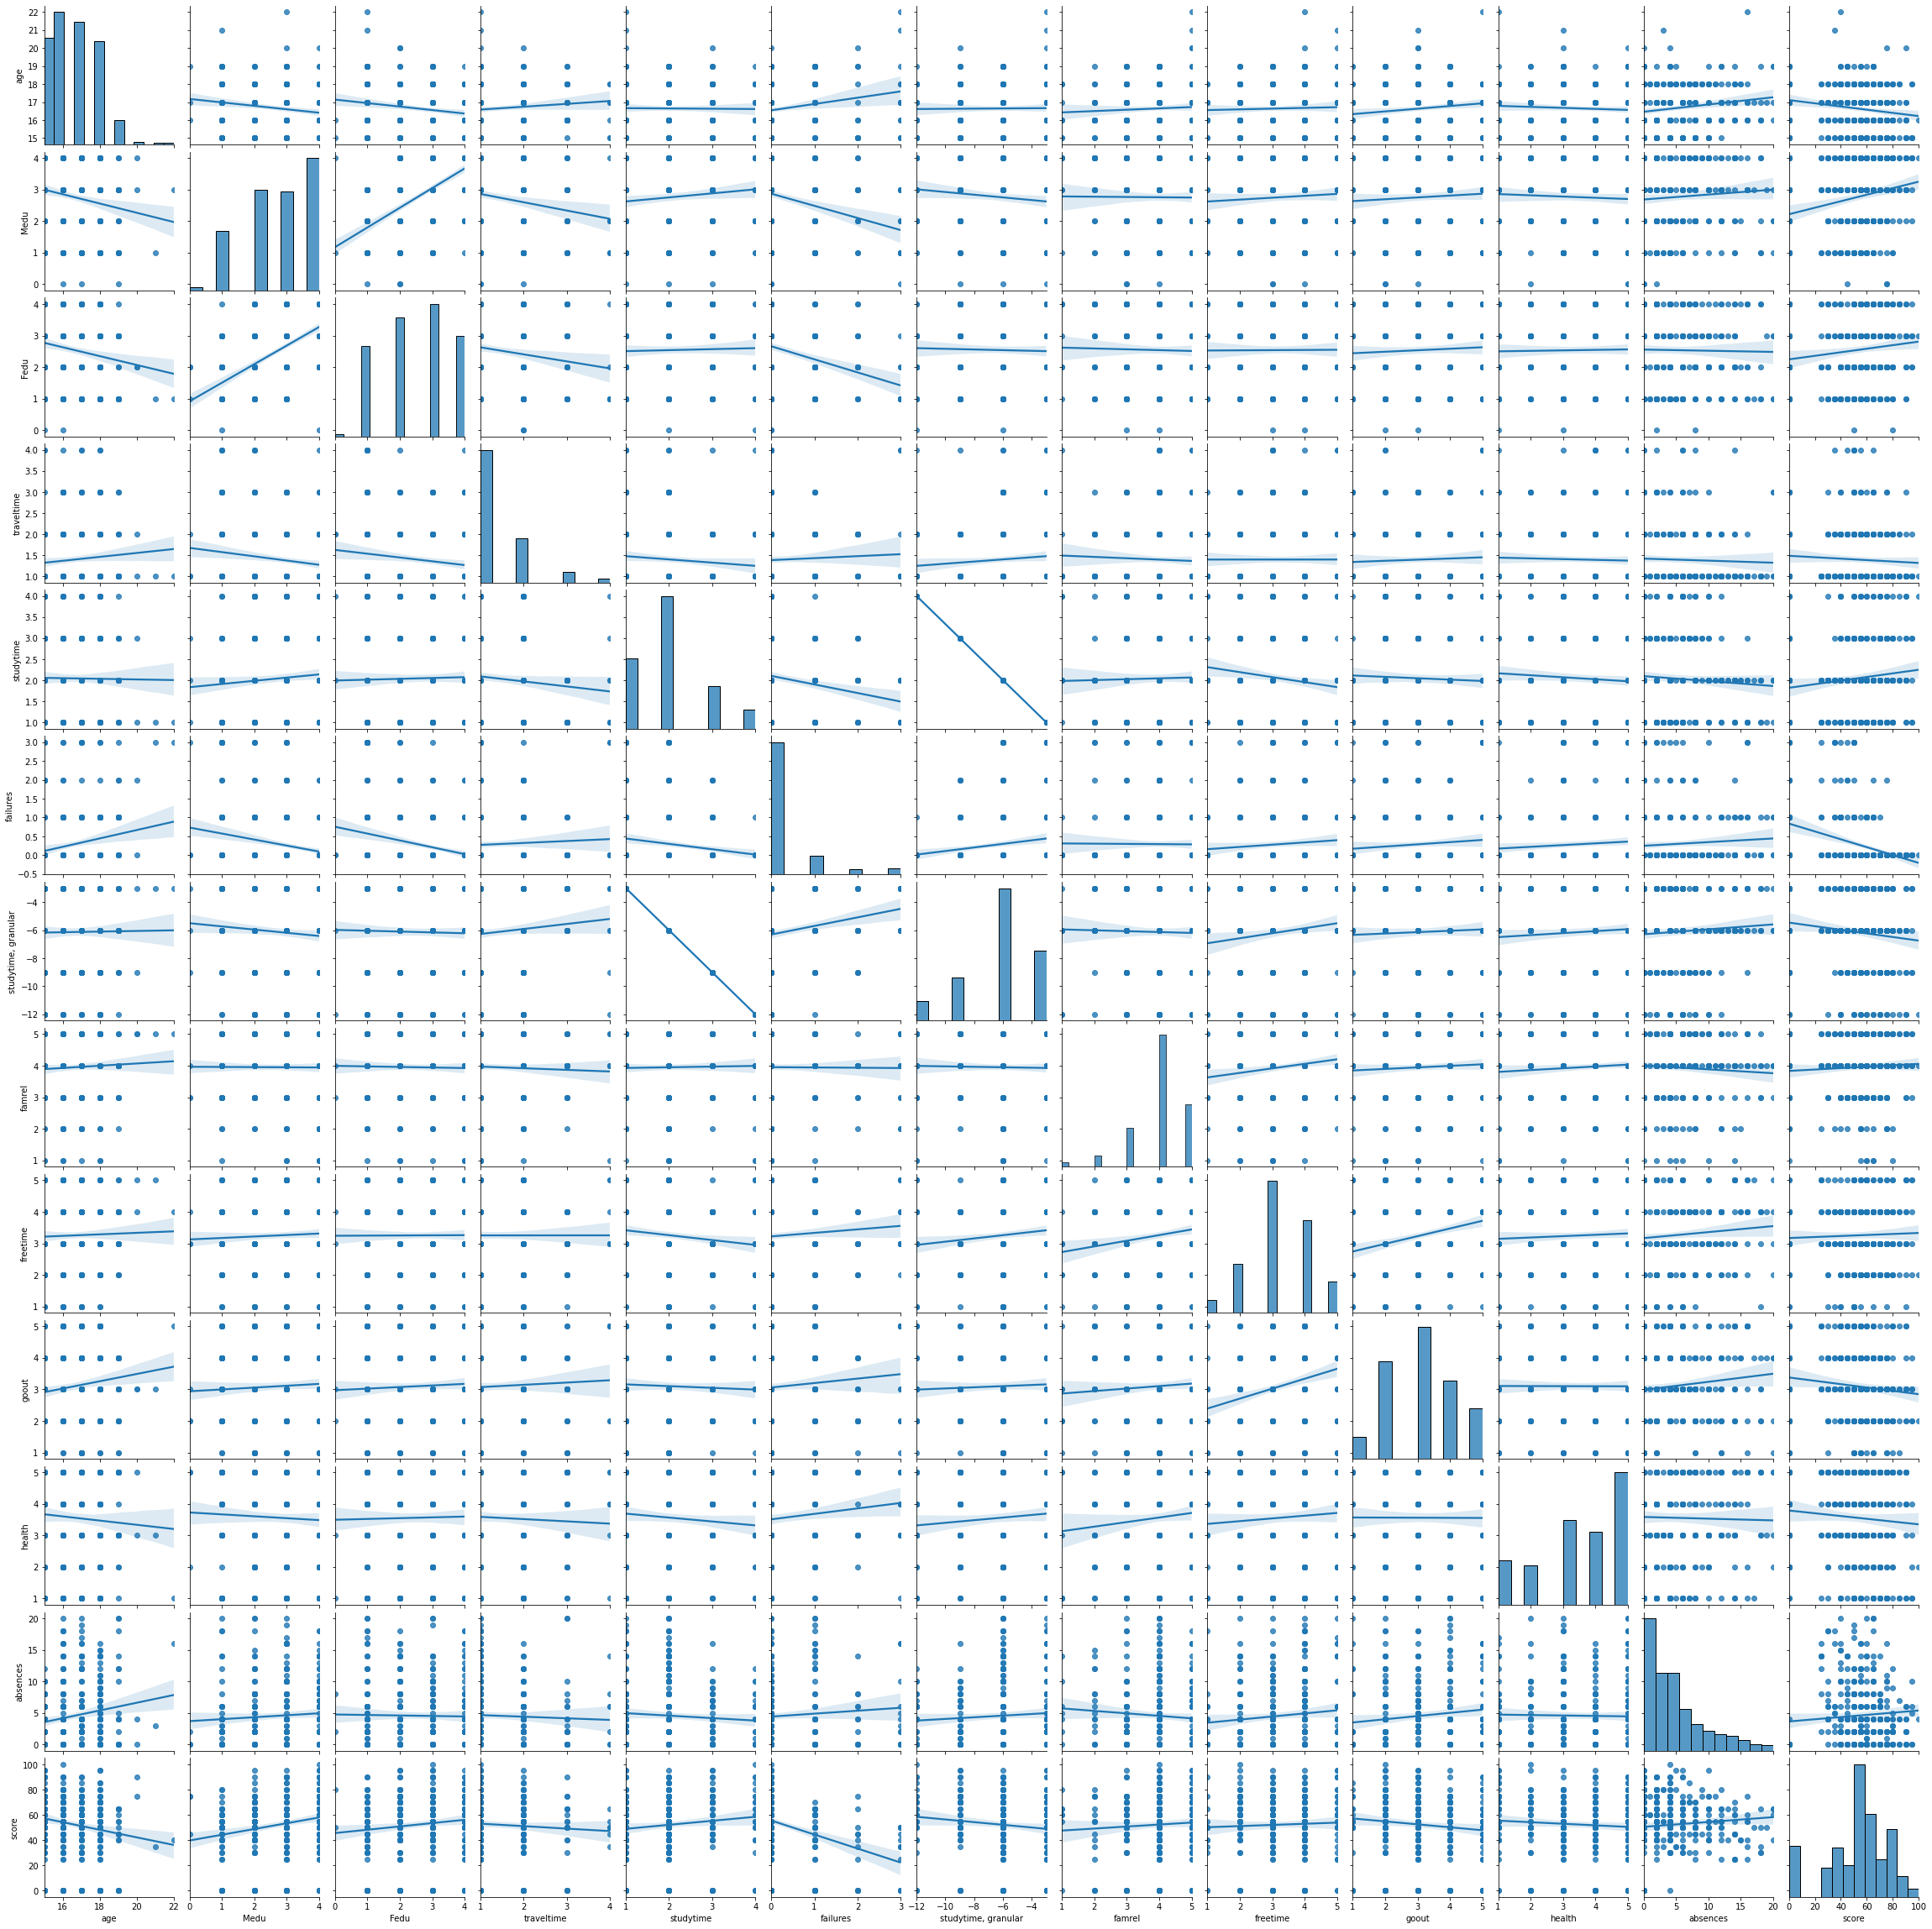

In [22]:
# Корреляционный анализ
sns.pairplot(students, kind='reg')

In [23]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.167349,-0.164741,0.085935,-0.011045,0.197141,0.011045,0.051423,0.031089,0.131667,-0.060930,0.156966,-0.163148
Medu,-0.167349,1.000000,0.605693,-0.162468,0.098584,-0.247746,-0.098584,-0.006899,0.053127,0.058395,-0.048616,0.069634,0.216701
Fedu,-0.164741,0.605693,1.000000,-0.141862,0.025089,-0.274328,-0.025089,-0.021403,0.005188,0.048567,0.019696,-0.017023,0.121501
traveltime,0.085935,-0.162468,-0.141862,1.000000,-0.095686,0.048956,0.095686,-0.040696,0.000211,0.044527,-0.035544,-0.035294,-0.057702
studytime,-0.011045,0.098584,0.025089,-0.095686,1.000000,-0.170281,-1.000000,0.021310,-0.135468,-0.042382,-0.076727,-0.067822,0.116674
failures,0.197141,-0.247746,-0.274328,0.048956,-0.170281,1.000000,0.170281,-0.007498,0.081502,0.090758,0.089310,0.067235,-0.340175
"studytime, granular",0.011045,-0.098584,-0.025089,0.095686,-1.000000,0.170281,1.000000,-0.021310,0.135468,0.042382,0.076727,0.067822,-0.116674
famrel,0.051423,-0.006899,-0.021403,-0.040696,0.021310,-0.007498,-0.021310,1.000000,0.160022,0.061918,0.091292,-0.069358,0.059558
freetime,0.031089,0.053127,0.005188,0.000211,-0.135468,0.081502,0.135468,0.160022,1.000000,0.276457,0.061142,0.096608,0.038314
goout,0.131667,0.058395,0.048567,0.044527,-0.042382,0.090758,0.042382,0.061918,0.276457,1.000000,-0.003049,0.113919,-0.111028


In [ ]:
# Выводы: анализируя представленные графики необходимо отметить что существует сильная отрицательная корреляция
# 1. между столбцами studytime, granular и studytime, коэффициент кореляции равен -1,
# что означает поведение одной переменной будет противоположным поведению другой

# 2.так же сильная корреляция (коэффициент по модулю больше 0,2) была выявлена у пар: Fedu и Medu (положит, 0,6);
# failures и Medu и failures и Fedu (отриц, 0,24 и 0,27 соотв); Medu и score (положит, 0,22) -
# очевидно это связанно с тем что у большинства учеников опекун именно мать, а так же goout и freetime (положит, 0,27) и
# age и failures (положит, 1,9).

# 3. на итоговый столбец score наиболее влияние оказывают следующие показатели:
# failures (отриц, -0,34) - с увеличением количества провалов снижается итоговая оценка,
# очевидно что провалы сигнализиют о неусвоенном материале, Medu (положит, 0,22), age (отриц, -0,16),
# Fedu (положит 0,12), studytime (положит 0,12), studytime, granular (отриц -0,12), goout (отриц -0,11).
# Прочие столбцы можно удалить

In [31]:
# Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

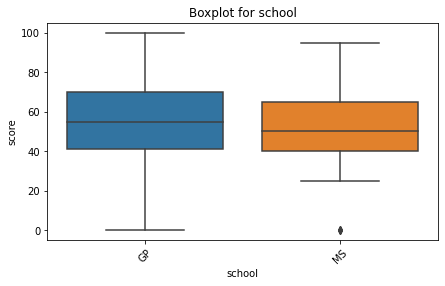

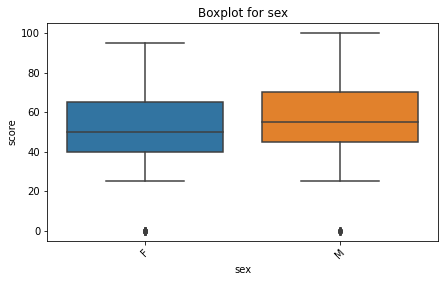

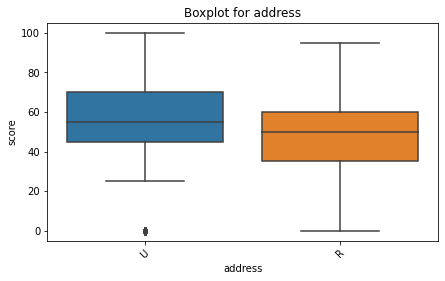

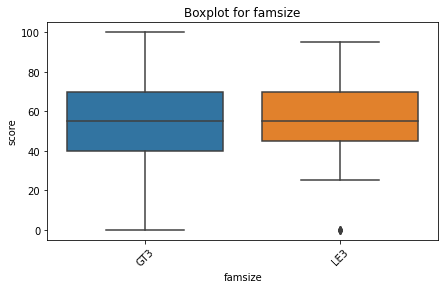

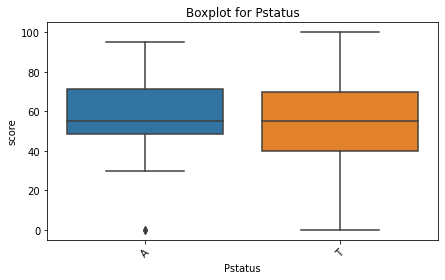

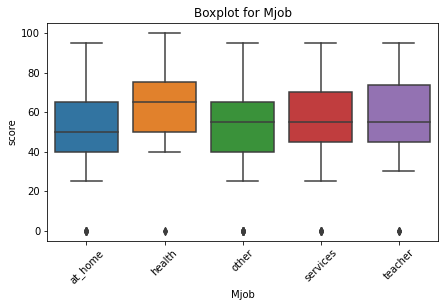

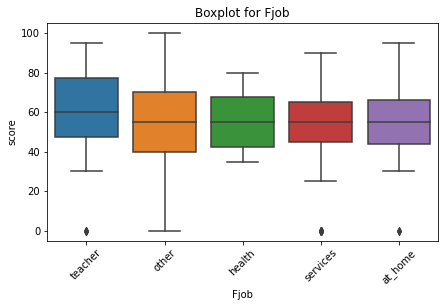

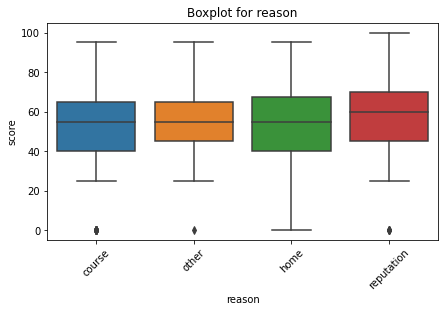

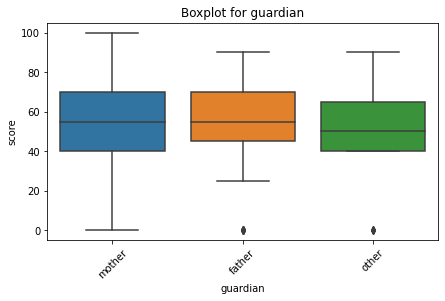

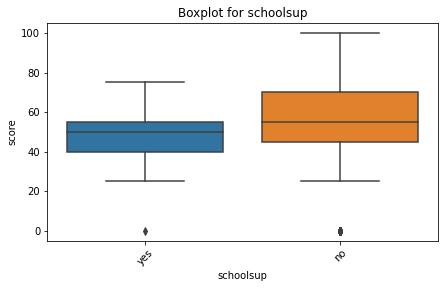

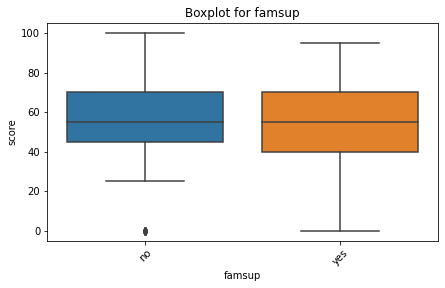

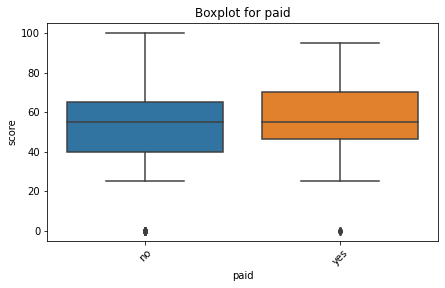

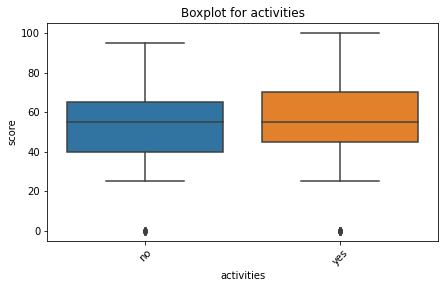

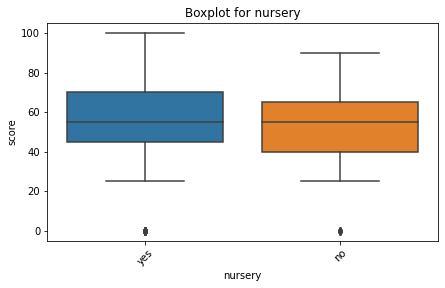

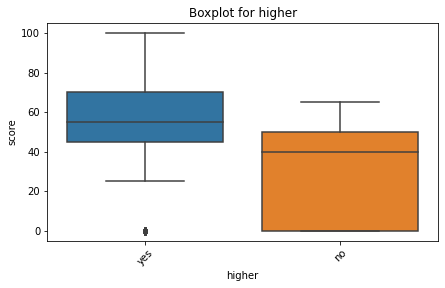

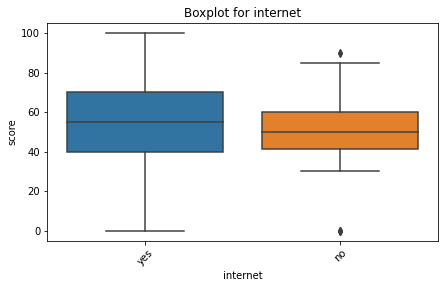

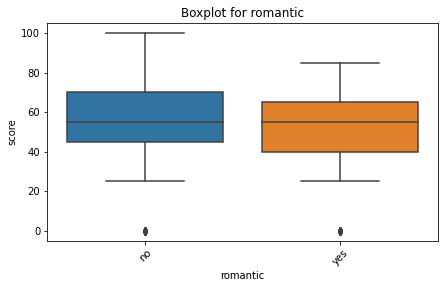

In [32]:
# Номинативные переменные, которые осталось рассмотреть:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

# Судя по графикам на столбец Score наибольшее влияние оказывают столбцы: sex, Mjob, higher

In [33]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [34]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [35]:
students_for_model = students.loc[:, ['sex', 'age', 'address', 'failures', 'Medu', 'Mjob', 'Fedu', 'studytime',
                                      'studytime, granular', 'goout', 'paid', 'higher', 'romantic']]
students_for_model.head()

,sex,age,address,failures,Medu,Mjob,Fedu,studytime,"studytime, granular",goout,paid,higher,romantic
0,F,18,U,0.0,4.0,at_home,4.0,2.0,-6.0,4.0,no,yes,no
1,F,17,U,0.0,1.0,at_home,1.0,2.0,-6.0,3.0,no,yes,no
2,F,15,U,3.0,1.0,at_home,1.0,2.0,-6.0,2.0,no,yes,no
3,F,15,U,0.0,4.0,health,2.0,3.0,-9.0,2.0,yes,yes,yes
4,F,16,U,0.0,3.0,other,3.0,2.0,-6.0,2.0,yes,yes,no


In [ ]:
# Выводы: в данных достаточно много пустых ячеек, однако аномалии были единичны, а выбросов было небольшие количество
# в столбце absences, что позволяет считать что данные достаточно чистые;

# отрицательная корреляция провалов говорит о том что с увеличением количества провалов снижается итоговая оценка,
# очевидно что провалы сигнализиют о неусвоенном материале, на итоговую оценку влиет образование и работа матери
# (отца в меньшей степени), а с увеличением возраста количество баллов снижается;

# Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это
#'sex', 'age', 'address', 'failures', 'Medu', 'Mjob', 'Fedu', 'studytime','studytime, granular', 
#'goout', 'paid', 'higher', 'romantic'.